Patrick Gray (patrick.c.gray at duke) - https://github.com/patrickcgray

Chapter 3: Plotting and visualizing your data with `matplotlib`
===============================================================

## TODO - has not yet been updated

## Introduction
[matplotlib](http://matplotlib.org/) is a very powerful plotting library for making amazing visualizations for publications, personal use, or even web and desktop applications. `matplotlib` can create almost any two dimensional visualization you can think of, including histograms, scatter plots, bivariate plots, and image displays. For some inspiration, check out the `matplotlib` [example gallery](http://matplotlib.org/gallery.html) which includes the source code required to generate each example.

A great resource for learning `matplotlib` is available from [J.R. Johansson](https://github.com/jrjohansson/scientific-python-lectures).

## matplotlib API - state-machine versus object-oriented
One part of `matplotlib` that may be initially confusing is that `matplotlib` contains two main methods of making plots - the object-oriented method, and the state-machine method. 

While the library can be either used in an object-oriented manner (i.e., you create an object representing the figure, then the figure can spawn objects representing the axes, etc.), the most familiar usage of `matplotlib` for MATLAB users is the [`pyplot`](http://matplotlib.org/api/pyplot_api.html) state-machine environment:

from the [matplotlib usage FAQ](http://matplotlib.org/faq/usage_faq.html):

    Pyplot’s state-machine environment behaves similarly to MATLAB and should be most familiar to users with MATLAB experience.
    
A very good overview of the difference between the two usages is provided by [Jake Vanderplas](http://jakevdp.github.io/mpl_tutorial/index.html). Specifically,

+ [Pyplot state-machine](http://jakevdp.github.io/mpl_tutorial/tutorial_pages/tut1.html)
+ [Object-oriented](http://jakevdp.github.io/mpl_tutorial/tutorial_pages/tut2.html)

In general, you should only use the `Pyplot` state-machine environment when plotting data interactively or when developing visualizations for your data. The object-oriented API, while more complicated, is a much more powerful way of creating plots and should be used when developing more complicated visualizations.

As this is a brief introduction to `matplotlib`, we will be using the `Pyplot` state-machine method for creating visualizations.

## Image display

We will begin by reading our example image into a NumPy memory array as shown in [Chapter 3](chapter_3_indices.ipynb)

In [120]:
# Import the Python 3 print function
from __future__ import print_function

# Import the "gdal" and "gdal_array" submodules from within the "osgeo" module
import rasterio

# Import the NumPy module
import numpy as np

# Open a GDAL dataset
dataset = rasterio.open('../../example/LE70220491999322EDC01_stack.gtif')
print(dataset)

image = dataset.read()

<open DatasetReader name='../../example/LE70220491999322EDC01_stack.gtif' mode='r'>


In [121]:
# How many bands does this image have?
num_bands = dataset.count
print('Number of bands in image: {n}\n'.format(n=num_bands))

# How many rows and columns?
rows, cols = dataset.shape
print('Image size is: {r} rows x {c} columns\n'.format(r=rows, c=cols))

# What driver was used to open the raster?
driver = dataset.driver
print('Raster driver: {d}\n'.format(d=driver))

# What is the raster's projection?
proj = dataset.crs
print('Image projection:')
print(proj)

Number of bands in image: 8

Image size is: 250 rows x 250 columns

Raster driver: GTiff

Image projection:
+init=epsg:32615


In [122]:
np.seterr(divide='ignore', invalid='ignore')
bandNIR = dataset.read(4)
bandRed = dataset.read(3)

#ndvi = np.zeros(bandNIR.shape, dtype=rasterio.float32)
ndvi = (bandNIR.astype(float)-bandRed.astype(float))/(bandNIR+bandRed)
print(ndvi.shape)

# we have to run this because much of the image is NaN due to it not being an exact rectangle / projected 
ndvi = np.nan_to_num(ndvi)
print(ndvi.shape)

(250, 250)
(250, 250)


In [123]:
# note that if you have the full dataset read in with image = dataset.read() you can do:
image = dataset.read()
print(image.shape)
red_band = image[2, :, :] # this pulls out the band at index 2 which is the 3rd band because python indexing starts at 0
print(red_band.shape)

# which is equal to simply doing
red_band_read = dataset.read(3) # this pulls out the 3rd band
print(red_band_read.shape)

if np.array_equal(red_band_read, red_band):
    print('They are the same.')

(8, 250, 250)
(250, 250)
(250, 250)
They are the same.


With the data read in and NDVI calculated, let's make some plots.

## Basic plotting
First thing to do is to import `matplotlib` into our namespace. I will be using a special feature of the IPython utility which allows me to "inline" `matplotlib` figures by entering the `%matplotlib inline` command. You might also want to try the `nbagg` backend designed specifically for Jupyter notebooks as this backend allows you to interact (pan, zoom, etc) with the plot.

In [124]:
import matplotlib.pyplot as plt
%matplotlib inline

With `matplotlib` imported, we can summon up a figure and make our first [plot](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot):

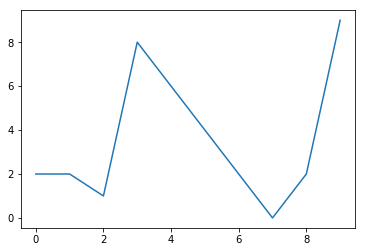

In [125]:
# Array of 0 - 9
x = np.arange(10)
# 10 random numbers, between 0 and 10
y = np.random.randint(0, 10, size=10)

# plot them as lines
plt.plot(x, y)

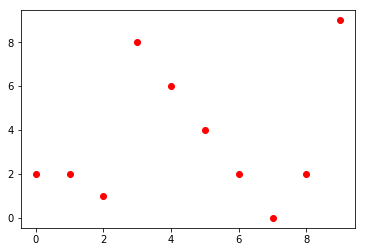

In [126]:
# plot them as just points -- specify "ls" ("linestyle") as a null string
plt.plot(x, y, 'ro', ls='')

## Plotting 2D arrays

One typical thing that we might want to do would be to plot one band against another. In order to do this, we will need to transform, or `flatten`, our 2 dimensional arrays of each band's values into 1 dimensional arrays:

In [128]:
print('Array shape before: {shp} (size is {sz})'.format(shp=image[:, :, 3].shape, sz=image[:, :, 3].size))

red = np.ndarray.flatten(bandRed)
nir = np.ndarray.flatten(bandNIR)

print('Array shape after: {shp} (size is {sz})'.format(shp=nir.shape, sz=nir.size))

Array shape before: (8, 250) (size is 2000)
Array shape after: (62500,) (size is 62500)


We have retained the number of entries in each of these raster bands, but we have flattened them from 2 dimensions into 1.

Now we can plot them. Since we just want points, we can use `scatter` for a [scatterplot](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.scatter). Since there are no lines in a scatterplot, it has a slightly different syntax.

Text(0.5, 1.0, 'Tasseled Cap, eh?')

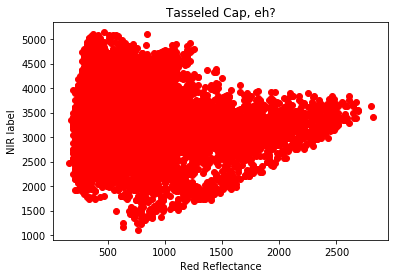

In [129]:
# Make the plot
plt.scatter(red, nir, color='r', marker='o')

# Add some axis labels
plt.xlabel('Red Reflectance')
plt.ylabel('NIR label')

# Add a title
plt.title('Tasseled Cap, eh?')

If we wanted the two axes to have the same limits, we can calculate the limits and apply them

Text(0.5, 1.0, 'Tasseled Cap, eh?')

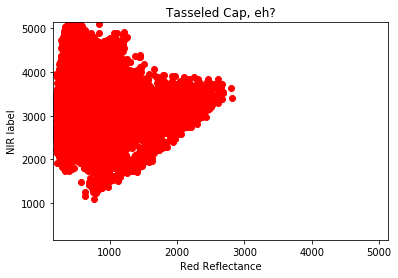

In [30]:
# Make the plot
plt.scatter(red, nir, color='r', marker='o')

# Calculate min and max
plot_min = min(red.min(), nir.min())
plot_max = max(red.max(), nir.max())

plt.xlim((plot_min, plot_max))
plt.ylim((plot_min, plot_max))

# Add some axis labels
plt.xlabel('Red Reflectance')
plt.ylabel('NIR label')

# Add a title
plt.title('Tasseled Cap, eh?')

## Plotting 2D arrays - images

With so much data available to look at, it can be hard to understand what is going on with the mess of points shown above. Luckily our datasets aren't just a mess of points - they have a spatial structure.

To show the spatial structure of our images, we could make an image plot of one of our bands using `imshow` to [display an image on the axes](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.imshow):

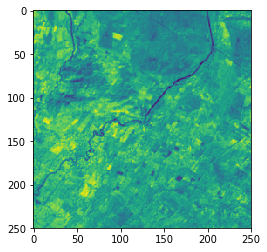

In [130]:
# use "imshow" for an image -- nir at first
plt.imshow(image[3, :, :])

Well, it looks like there is something going on - maybe a river in the center and some bright vegetation to the bottom left of the image. What's lacking is any knowledge of what the colors mean.

Luckily, `matplotlib` can provide us a [colorbar](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.colorbar).

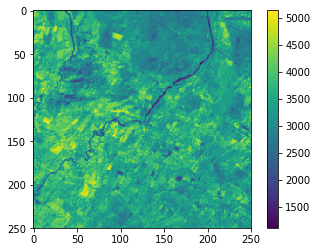

In [131]:
# use "imshow" for an image -- nir at first
plt.imshow(image[3, :, :])
plt.colorbar()

If we want a greyscale image, we can manually specify a [colormap](http://matplotlib.org/api/colors_api.html#matplotlib.colors.Colormap):

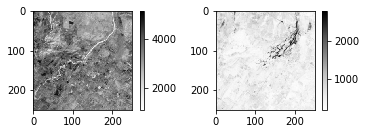

In [132]:
# use "imshow" for an image -- nir in first subplot, red in second
plt.subplot(221)
plt.imshow(image[3, :, :], cmap=plt.cm.Greys)
plt.colorbar()

# Now red band in the second subplot (indicated by first of the 3 numbers)
plt.subplot(222)
plt.imshow(image[2, :, :], cmap=plt.cm.Greys)
plt.colorbar()

## Plotting 3D arrays - multispectral images

Greyscale images are nice, but the most information we can receive comes from looking at the interplay among different bands. To accomplish this, we can map different spectral bands to the Red, Green, and Blue channels on our monitors.

Before we can do this, the `matplotlib` `imshow` help tells us that we need to [normalize](http://en.wikipedia.org/wiki/Normalization_%28image_processing%29) our bands into a 0 - 1 range. To do so, we will perform a simple linear scale fitting 0 reflectance to 0 and 80% reflectance to 1, clipping anything larger or smaller.

    Remember:

    If we are going from a Int16 datatype (e.g., reflectance scaled by 10,000x) to a decimal between 0 and 1, we will need to use a Float!

(3, 250, 250)
(250, 250, 3)


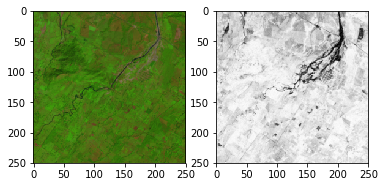

In [161]:
from rasterio.plot import reshape_as_raster, reshape_as_image

# Extract reference to SWIR1, NIR, and Red bands
index = np.array([4, 3, 2])
colors = image[index, :, :].astype(np.float64)

max_val = 8000
min_val = 0

# Enforce maximum and minimum values
colors[colors[:, :, :] > max_val] = max_val
colors[colors[:, :, :] < min_val] = min_val

for b in range(colors.shape[0]):
    colors[b, :, :] = colors[b, :, :] * 1 / (max_val - min_val)

# rasters are in the format [bands, rows, cols] whereas images are typically [rows, cols, bands]
# and so our array needs to be reshaped
print(colors.shape)
colors_reshaped = reshape_as_image(colors)
print(colors_reshaped.shape)

plt.subplot(121)
plt.imshow(colors_reshaped)

# Show NDVI
plt.subplot(122)
plt.imshow(ndvi, cmap=plt.cm.Greys_r)

#### Now there is a slighly easier way to do this, rasterio has its own show function that is built to handle rasterio rasters

In [134]:
# these import build on matplotlib and make them custom for rasterio
from rasterio import plot as rast_plot

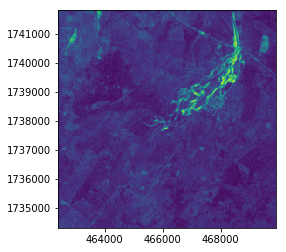

In [164]:
rast_plot.show(dataset.read(1), transform=dataset.transform)

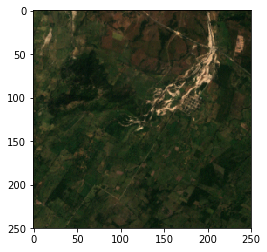

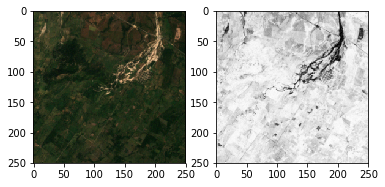

In [165]:
rgb = dataset.read((3,2,1)) # read in red, green, blue
rgb_norm = rast_plot.adjust_band(rgb) # normalize bands to range between 1.0 to 0.0

rast_plot.show(rgb_norm) # the rasterio show function takes in [bands, rows, cols]

rgb_reshaped = reshape_as_image(rgb_norm) # reshape to [rows, cols, bands]

plt.subplot(121)
plt.imshow(rgb_reshaped)
plt.subplot(122)
plt.imshow(ndvi, cmap=plt.cm.Greys_r)

### displaying all three bands side by side

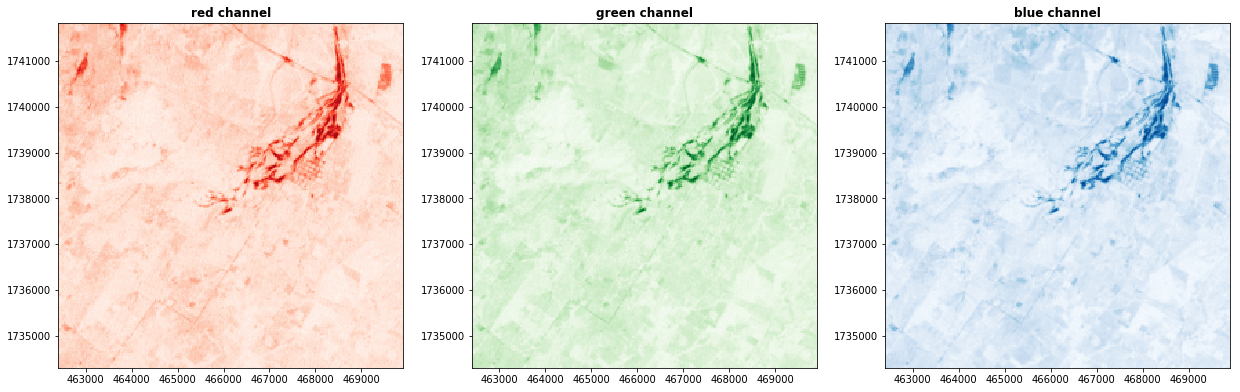

In [166]:
fig, (axr, axg, axb) = plt.subplots(1,3, figsize=(21,7))
rast_plot.show((dataset, 1), ax=axr, cmap='Reds', title='red channel')
rast_plot.show((dataset, 2), ax=axg, cmap='Greens', title='green channel')
rast_plot.show((dataset, 3), ax=axb, cmap='Blues', title='blue channel')

### If we want to see a histogram of the data we use the show_hist function

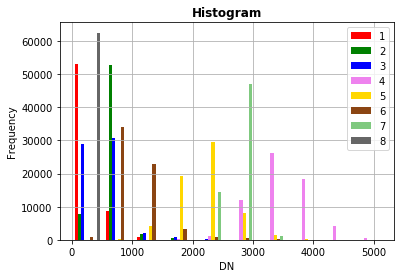

In [167]:
%matplotlib inline
rast_plot.show_hist(dataset)

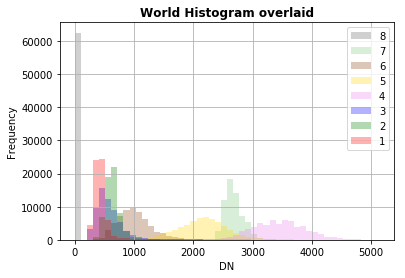

In [168]:
rast_plot.show_hist(dataset, bins=50, lw=0.0, stacked=False, alpha=0.3, 
               histtype='stepfilled', title="World Histogram overlaid")

### Let's look at another raster

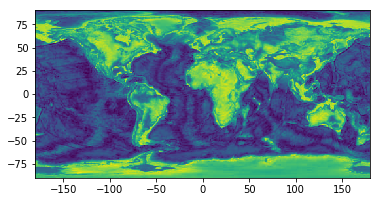

In [169]:
world = rasterio.open("../../example/world.rgb.tif")
rast_plot.show((world), cmap='viridis')

### in this one we can also easily show contours from a raster

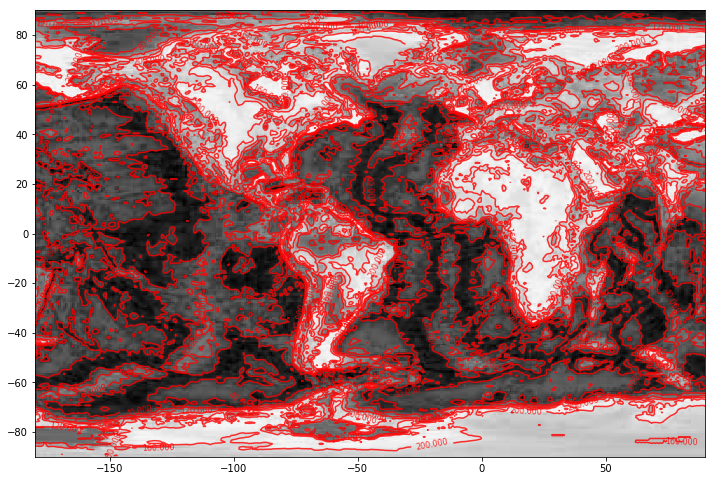

In [170]:
fig, ax = plt.subplots(1, figsize=(12, 12))
rast_plot.show((world, 1), cmap='Greys_r', interpolation='none', ax=ax)
ax.set_xlim(-180, 90)
ax.set_ylim(-90, 90)

rast_plot.show((world, 1), contour=True, ax=ax)

## Wrapup

We seen how matplotlib can be combined with NumPy and rasterio to easily visualize and explore our remote sensing data. In the next chapter (link to [webpage](chapter_3_vector.html) or [Notebook](chapter_3_vector.ipynb)) we will cover how to use GDAL's companion library - OGR - to open and read vector data.